In [4]:
from cycler import cycler
from gather_averages_2_1 import gather_averages
import matplotlib.pyplot as plt

In [5]:
# Extract data
inputdir="/home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053"
all_reps_extracted = gather_averages(inputdir)
all_reps=all_reps_extracted.reset_index()

Input directory is " /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053
Workload is " writeOnly
Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc
    Repetition 1
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc/1
    Repetition 2
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc/2
    Repetition 3
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc/3
Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_4vc
    Repetition 1
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_4vc/1
 

Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/readOnly_16vc
    Repetition 1
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/readOnly_16vc/1
    Repetition 2
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/readOnly_16vc/2
    Repetition 3
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/readOnly_16vc/3
Processing directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/readOnly_8vc
    Repetition 1
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/readOnly_8vc/1
    Repetition 2
    Rep directory /home/flo/Documents/eth-asl-final-experiment-data/exp2/2_1_baseline_oneserver_2017-11-16_080053/readOnly_8vc/2
    Re

In [6]:
# Group by and calculate AVG and MEAN
averages = all_reps.groupby(['num_clients', 'workload'], as_index=True).agg(
                      {'sum_throughput':['mean','std'],'avg_responsetime':['mean','std']})
avg = averages.reset_index()

In [7]:
# Calculate throughput and responsetime using interactive responsetime laws
avg['interact_responsetime_mean'] = avg['num_clients']/avg[('sum_throughput', 'mean')]*1000
avg['interact_throughput_mean'] = avg['num_clients']/avg[('avg_responsetime', 'mean')]*1000

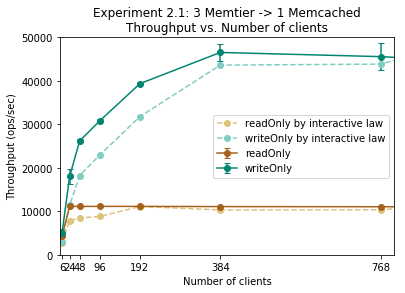

In [8]:
# Throughput using interactive laws
fig, ax = plt.subplots()
ax.set_ylim([0,50000])
ax.set_xlim([0, 800])
ax.set_prop_cycle(cycler('color',['#a6611a','#dfc27d', '#018571', '#80cdc1']))
for key, grp in avg.groupby(['workload']):
    ax.errorbar(grp['num_clients'], grp[('sum_throughput', 'mean')], yerr=2*grp[('sum_throughput', 'std')], label=key,  marker='o', capsize=3)
    ax.plot(grp['num_clients'], grp['interact_throughput_mean'], label=key + " by interactive law",  marker='o', linestyle='--')
    plt.xticks(grp['num_clients'].head(7))
ax.legend(loc="center right")
ax.set_title("Experiment 2.1: 3 Memtier -> 1 Memcached\nThroughput vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Throughput (ops/sec)")

plt.show()
fig.savefig('exp2_1_throughput.png', dpi=300)

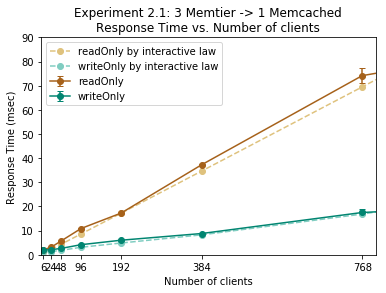

In [9]:
# 2.1 Responsetime graph
fig, ax = plt.subplots()
ax.set_ylim([0,90])
ax.set_xlim([0, 800])
ax.set_prop_cycle(cycler('color',['#a6611a','#dfc27d', '#018571', '#80cdc1']))
for key, grp in avg.groupby(['workload']):
    ax.errorbar(grp['num_clients'], grp[('avg_responsetime', 'mean')], yerr=2*grp[('avg_responsetime', 'std')], label=key,  marker='o', capsize=3)
    ax.plot(grp['num_clients'], grp['interact_responsetime_mean'], label=key + " by interactive law",  marker='o', linestyle='--')
    plt.xticks(grp['num_clients'].head(7))
ax.legend(loc="upper left")
ax.set_title("Experiment 2.1: 3 Memtier -> 1 Memcached\nResponse Time vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Response Time (msec)")
plt.show()
fig.savefig('exp2_1_responsetime.png', dpi=300)

In [10]:
avg


num_clients   workload sum_throughput              avg_responsetime  \
                                    mean          std             mean   
0            6   readOnly    4403.961560   652.658542         2.121745   
1            6  writeOnly    5058.494253   444.880283         1.967011   
2           24   readOnly   11132.835148     2.294433         3.066408   
3           24  writeOnly   18013.849959   871.010066         2.111065   
4           48   readOnly   11120.997947     6.684631         5.673241   
5           48  writeOnly   26185.324561   167.532203         2.632506   
6           96   readOnly   11136.083124     4.296883        10.878947   
7           96  writeOnly   30805.414204   172.199853         4.184341   
8          192   readOnly   11133.304212     4.067691        17.287210   
9          192  writeOnly   39357.140380   152.748315         6.041571   
10         384   readOnly   11086.855386    35.943519        37.240200   
11         384  writeOnly   46531.956767   929.989896         8.804352   
12         768   readOnly   11050.982555     7.611443        74.159457   
13         768  writeOnly   45565.091648  1584.119124        17.514440   
14        1536   readOnly   11006.497064    45.190912        97.026716   
15        1536  writeOnly   41613.438967   935.188264        23.880489   

             interact_responsetime_mean interact_throughput_mean  
         std                                                      
0   0.327313                   1.362410              2827.860486  
1   0.113997                   1.186124              3050.312628  
2   0.024898                   2.155785              7826.748295  
3   0.085272                   1.332308             11368.671594  
4   0.044576                   4.316159              8460.772293  
5   0.033665                   1.833088             18233.577247  
6   0.039291                   8.620625              8824.383164  
7   0.055092                   3.116335             22942.680090  
8   0.009496                  17.245554             11106.477130  
9   0.062083                   4.878403             31779.814313  
10  0.085236                  34.635610             10311.437641  
11  0.083490                   8.252393             43614.794872  
12  1.542601                  69.496083             10356.062951  
13  0.618623                  16.855008             43849.531067  
14  1.386324                 139.553937             15830.691471  
15  0.505174                  36.911153             64320.290948